<a href="https://colab.research.google.com/github/ArunKoundinya/DeepLearning/blob/main/posts/deep-learning-project-msis/AmazonReviews_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Reviews Sentiment Analysis - Part 3


In this file we will perform the following steps

-  Loading the Data
-  Feedforward NN  on 10K Dataset
-  Feedforward NN  on 20K Dataset
-  Feedforward NN  on 1Lac Dataset
-  Feedforward NN  on Whole Dataset { Ambitious }

## Table of Contents
- [1 - Packages](#1)
- [2 - Loading the Dataset](#2)
- [3 - Feed Forward NN](#3)
    - [With 10K](#base-model-1)
    - [With 10K](#base-model-2)
    - [With 1 Lac](#base-model-3)
    - [Whole Dataset](#base-model-4)

<a name='1'></a>
## 1 - Loading the Packages

In [ ]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=45e8a6b503fab437c15fdd400f7a1351e7c6db074d4338bc86f19a82e1dfe898
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform


from sklearn.metrics import accuracy_score, classification_report

from pandarallel import pandarallel

<a name='2'></a>
## 2 - Loading the Dataset

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/MSIS/IntroductiontoDeepLearning/Project/')

testdata = pd.read_csv('test_data_sample_complete.csv')
traindata = pd.read_csv('train_data_sample_complete.csv')


Mounted at /content/drive


<a name='3'></a>
## 3 - Feed Foward NN

<a name='base-model-1'></a>
### 3.1 - Feed Foward NN with 10K

In [ ]:
# Initialize pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
traindata.head()

,class_index,review_combined_lemma
0,2,stuning even nongamer sound track beautiful pa...
1,2,best soundtrack ever anything im reading lot r...
2,2,amazing soundtrack favorite music time hand in...
3,2,excellent soundtrack truly like soundtrack enj...
4,2,remember pull jaw floor hearing youve played g...


In [ ]:
train_data = traindata.sample(n=10000, random_state=42)
test_data = testdata.sample(n=1000, random_state=42)

train_data['class_index'] = train_data['class_index'].map({1:0, 2:1})
test_data['class_index'] = test_data['class_index'].map({1:0, 2:1})

train_data['review_combined_lemma'] = train_data['review_combined_lemma'].fillna('')
test_data['review_combined_lemma'] = test_data['review_combined_lemma'].fillna('')

X_train = train_data.review_combined_lemma
y_train = np.array(train_data.class_index)

X = test_data.review_combined_lemma
y = np.array(test_data.class_index)

tokenizer = Tokenizer(oov_token="<UNK>",)
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer.word_index['<PAD>'] = 0

In [ ]:
print(tokenizer.word_index)

{'<UNK>': 1, 'not': 2, 'book': 3, 'one': 4, 'great': 5, 'good': 6, 'like': 7, 'would': 8, 'time': 9, 'get': 10, 'read': 11, 'movie': 12, 'no': 13, 'dont': 14, 'work': 15, 'really': 16, 'love': 17, 'much': 18, 'even': 19, 'well': 20, 'first': 21, 'product': 22, 'make': 23, 'cd': 24, 'year': 25, 'buy': 26, 'album': 27, 'better': 28, 'best': 29, 'use': 30, 'story': 31, 'bought': 32, 'way': 33, 'song': 34, 'also': 35, 'did': 36, 'could': 37, 'thing': 38, 'little': 39, 'know': 40, 'think': 41, 'im': 42, 'new': 43, 'doe': 44, 'back': 45, 'many': 46, 'want': 47, 'money': 48, 'got': 49, 'never': 50, 'dvd': 51, 'music': 52, 'go': 53, 'say': 54, 'bad': 55, 'see': 56, 'should': 57, 'two': 58, 'didnt': 59, 'still': 60, 'made': 61, 'recommend': 62, 'sound': 63, 'ever': 64, 'character': 65, 'review': 66, 'people': 67, 'find': 68, 'look': 69, 'quality': 70, 'used': 71, 'day': 72, 'give': 73, 'old': 74, 'game': 75, 'ive': 76, 'lot': 77, 'reading': 78, 'cant': 79, 'need': 80, 'put': 81, 'life': 82, 'st

In [ ]:
X_sequences_train = tokenizer.texts_to_sequences(X_train)

X_sequences = tokenizer.texts_to_sequences(X)

X_train = pad_sequences(X_sequences_train, maxlen=100)
X = pad_sequences(X_sequences, maxlen=100)

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(10000, 100)
(800, 100)
(200, 100)


In [ ]:
train_data['class_index'].value_counts()

class_index
1    5046
0    4954
Name: count, dtype: int64

In [ ]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,   644,
         485,    22,  3738,   150,   871,  4544, 16034,   408,  6603,
        5926,  2882,   458,  3739, 16035,   481,   255,   169,    39,
       16036,  2882, 16037,   231,  2755,  6603,   163,  8994,  2882,
         150,   159,  2560, 16038,   458,  3739,   562,   319,   256,
        2756,   749,   179,   193, 16039,    95, 16040,  1520,   769,
          30,  1292,  2000,  1498, 16041,   754,   128,    19,   577,
         485], dtype=int32)

In [ ]:
len(tokenizer.word_index)

39128

In [ ]:
model_ffnn = Sequential()
model_ffnn.add(tf.keras.layers.Dense(units=48, activation='relu',  kernel_initializer=GlorotUniform(), input_shape=(100,)))
model_ffnn.add(tf.keras.layers.Dropout(0.5))
model_ffnn.add(tf.keras.layers.BatchNormalization())
model_ffnn.add(tf.keras.layers.Dense(units=24, kernel_initializer=GlorotUniform(), activation='sigmoid'))
model_ffnn.add(tf.keras.layers.Dropout(0.5))
model_ffnn.add(tf.keras.layers.BatchNormalization())
model_ffnn.add(tf.keras.layers.Dense(units=12, kernel_initializer=GlorotUniform(), activation='relu'))
model_ffnn.add(tf.keras.layers.Dropout(0.5))
model_ffnn.add(tf.keras.layers.BatchNormalization())
model_ffnn.add(tf.keras.layers.Dense(units=8,  kernel_initializer=GlorotUniform(),activation='sigmoid'))
model_ffnn.add(tf.keras.layers.Dropout(0.5))
model_ffnn.add(tf.keras.layers.BatchNormalization())
model_ffnn.add(tf.keras.layers.Dense(units=4, kernel_initializer=GlorotUniform() ,activation='relu'))
model_ffnn.add(tf.keras.layers.Dense(units=1,  kernel_initializer=GlorotUniform(),activation='softmax'))

In [ ]:

model_ffnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                4848      
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 batch_normalization (Batch  (None, 48)                192       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 24)                96        
 chNormalization)                                       

In [ ]:
initial_learning_rate = 0.001

optimizer = Adam(learning_rate=initial_learning_rate)

model_ffnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model_ffnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_dev, y_dev))

loss, accuracy = model_ffnn.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/5
157/157 [==============================] - 8s 9ms/step - loss: 0.7257 - accuracy: 0.5046 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 2/5
157/157 [==============================] - 1s 7ms/step - loss: 0.7013 - accuracy: 0.5046 - val_loss: 0.6933 - val_accuracy: 0.5100
Epoch 3/5
157/157 [==============================] - 1s 7ms/step - loss: 0.6998 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.5100
Epoch 4/5
157/157 [==============================] - 1s 7ms/step - loss: 0.6959 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.5100
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4800
Test Loss: 0.6932985782623291, Test Accuracy: 0.47999998927116394


In [ ]:
model_ffn_history = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_dev, y_dev),verbose=0)

loss, accuracy = model_ffnn.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4800
Test Loss: 0.6937255859375, Test Accuracy: 0.47999998927116394


In [ ]:
from plotnine import *

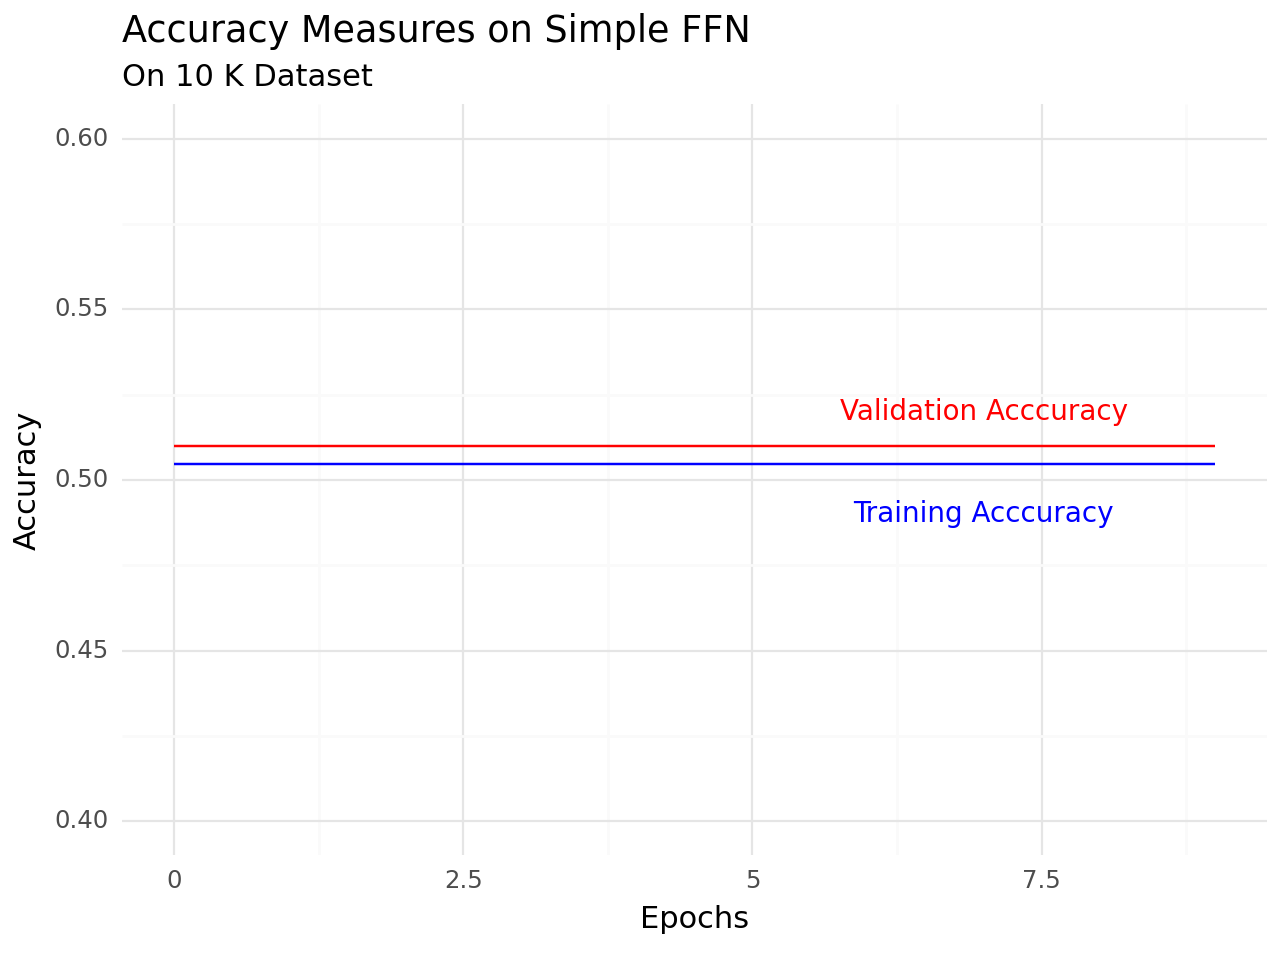

<Figure Size: (640 x 480)>

In [ ]:
( pd.DataFrame(model_ffn_history.history) >>
 ggplot(aes(x=pd.DataFrame(model_ffn_history.history).index, y='accuracy')) +
 geom_line(color = "blue") +
 geom_line(aes(y='val_accuracy'), color = "red") +
 theme_minimal() +
  labs(x="Epochs", y="Accuracy",
       title= "Accuracy Measures on Simple FFN",
       subtitle = "On 10 K Dataset") +
  annotate(
      "text",
      x = 7,
      y = 0.49,
      label = "Training Acccuracy",
      color = "blue",
      size = 10
  ) +
  annotate(
      "text",
      x = 7,
      y = 0.52,
      label = "Validation Acccuracy",
      color = "red",
      size = 10
  ) +
  coord_cartesian(ylim = [0.4,0.6])
 )

<a name='base-model-2'></a>
### 3.2 - Feed Foward NN with 20K

In [ ]:
train_data = traindata.sample(n=20000, random_state=42)
test_data = testdata.sample(n=1000, random_state=42)

train_data['class_index'] = train_data['class_index'].map({1:0, 2:1})
test_data['class_index'] = test_data['class_index'].map({1:0, 2:1})

train_data['review_combined_lemma'] = train_data['review_combined_lemma'].fillna('')
test_data['review_combined_lemma'] = test_data['review_combined_lemma'].fillna('')

X_train = train_data.review_combined_lemma
y_train = np.array(train_data.class_index)

X = test_data.review_combined_lemma
y = np.array(test_data.class_index)

tokenizer = Tokenizer(oov_token="<UNK>",)
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer.word_index['<PAD>'] = 0

In [ ]:
X_sequences_train = tokenizer.texts_to_sequences(X_train)

X_sequences = tokenizer.texts_to_sequences(X)

X_train = pad_sequences(X_sequences_train, maxlen=100)
X = pad_sequences(X_sequences, maxlen=100)

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(20000, 100)
(500, 100)
(500, 100)


In [ ]:
train_data['class_index'].value_counts()

class_index
1    10027
0     9973
Name: count, dtype: int64

In [ ]:
model_ffnn_1 = Sequential()
model_ffnn_1.add(tf.keras.layers.Dense(units=48, activation='relu',  kernel_initializer=GlorotUniform(), input_shape=(100,)))
model_ffnn_1.add(tf.keras.layers.Dropout(0.5))
model_ffnn_1.add(tf.keras.layers.BatchNormalization())
model_ffnn_1.add(tf.keras.layers.Dense(units=24, kernel_initializer=GlorotUniform(), activation='sigmoid'))
model_ffnn_1.add(tf.keras.layers.Dropout(0.5))
model_ffnn_1.add(tf.keras.layers.BatchNormalization())
model_ffnn_1.add(tf.keras.layers.Dense(units=12, kernel_initializer=GlorotUniform(), activation='relu'))
model_ffnn_1.add(tf.keras.layers.Dropout(0.5))
model_ffnn_1.add(tf.keras.layers.BatchNormalization())
model_ffnn_1.add(tf.keras.layers.Dense(units=8,  kernel_initializer=GlorotUniform(),activation='sigmoid'))
model_ffnn_1.add(tf.keras.layers.Dropout(0.5))
model_ffnn_1.add(tf.keras.layers.BatchNormalization())
model_ffnn_1.add(tf.keras.layers.Dense(units=4, kernel_initializer=GlorotUniform() ,activation='relu'))
model_ffnn_1.add(tf.keras.layers.Dense(units=1,  kernel_initializer=GlorotUniform(),activation='softmax'))

In [ ]:
model_ffnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 48)                4848      
                                                                 
 dropout_4 (Dropout)         (None, 48)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 48)                192       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 24)                1176      
                                                                 
 dropout_5 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_5 (Bat  (None, 24)                96        
 chNormalization)                                     

In [ ]:
initial_learning_rate = 0.001

optimizer = Adam(learning_rate=initial_learning_rate)


model_ffnn_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model_ffn_1_history = model_ffnn_1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_dev, y_dev))

loss, accuracy = model_ffnn_1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
313/313 [==============================] - 5s 6ms/step - loss: 0.7381 - accuracy: 0.5013 - val_loss: 0.6934 - val_accuracy: 0.5160
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.7008 - accuracy: 0.5013 - val_loss: 0.6930 - val_accuracy: 0.5160
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 0.6955 - accuracy: 0.5013 - val_loss: 0.6928 - val_accuracy: 0.5160
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.6941 - accuracy: 0.5013 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 0.6938 - accuracy: 0.5013 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.6939 - accuracy: 0.5013 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.6937 - accuracy: 0.5013 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 

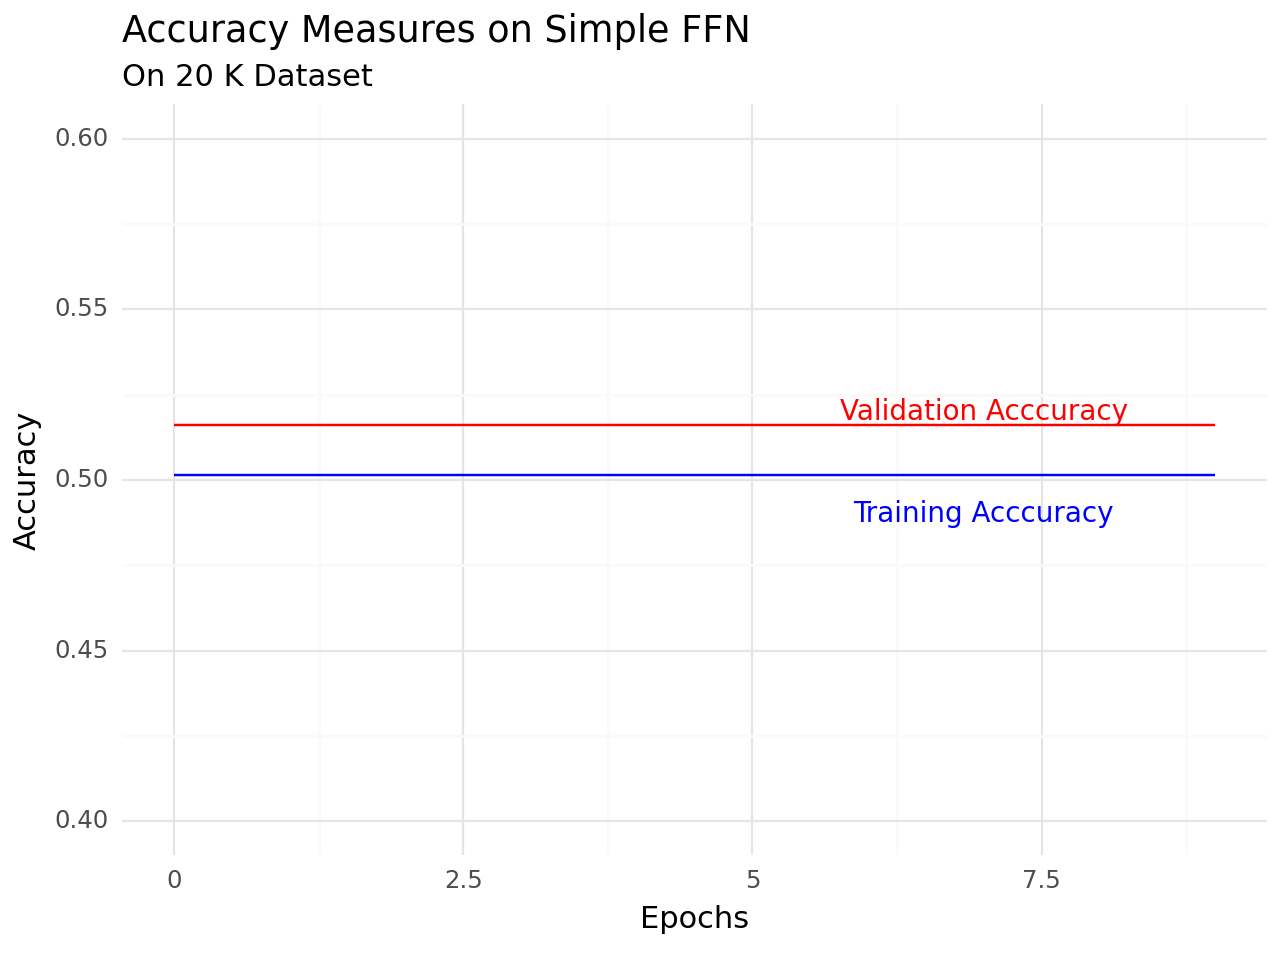

<Figure Size: (640 x 480)>

In [ ]:
( pd.DataFrame(model_ffn_1_history.history) >>
 ggplot(aes(x=pd.DataFrame(model_ffn_1_history.history).index, y='accuracy')) +
 geom_line(color = "blue") +
 geom_line(aes(y='val_accuracy'), color = "red") +
 theme_minimal() +
  labs(x="Epochs", y="Accuracy",
       title= "Accuracy Measures on Simple FFN",
       subtitle = "On 20 K Dataset") +
  annotate(
      "text",
      x = 7,
      y = 0.49,
      label = "Training Acccuracy",
      color = "blue",
      size = 10
  ) +
  annotate(
      "text",
      x = 7,
      y = 0.52,
      label = "Validation Acccuracy",
      color = "red",
      size = 10
  ) +
  coord_cartesian(ylim = [0.4,0.6])
 )

<a name='base-model-3'></a>
### 3.3 - Feed Foward NN with 1Lac



In [ ]:
train_data = traindata.sample(n=100000, random_state=42)
test_data = testdata.sample(n=10000, random_state=42)

train_data['class_index'] = train_data['class_index'].map({1:0, 2:1})
test_data['class_index'] = test_data['class_index'].map({1:0, 2:1})

train_data['review_combined_lemma'] = train_data['review_combined_lemma'].fillna('')
test_data['review_combined_lemma'] = test_data['review_combined_lemma'].fillna('')

X_train = train_data.review_combined_lemma
y_train = np.array(train_data.class_index)

X = test_data.review_combined_lemma
y = np.array(test_data.class_index)

tokenizer = Tokenizer(oov_token="<UNK>",)
tokenizer.fit_on_texts(X_train)

In [ ]:
train_data['class_index'].value_counts()

class_index
0    50013
1    49987
Name: count, dtype: int64

In [ ]:
tokenizer.word_index['<PAD>'] = 0

In [ ]:
X_sequences_train = tokenizer.texts_to_sequences(X_train)

X_sequences = tokenizer.texts_to_sequences(X)

X_train = pad_sequences(X_sequences_train, maxlen=100)
X = pad_sequences(X_sequences, maxlen=100)

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(100000, 100)
(5000, 100)
(5000, 100)


In [ ]:
model_ffnn_2 = Sequential()
model_ffnn_2.add(tf.keras.layers.Dense(units=128, activation='relu',  kernel_initializer=GlorotUniform(), input_shape=(100,)))
model_ffnn_2.add(tf.keras.layers.Dropout(0.5))
model_ffnn_2.add(tf.keras.layers.BatchNormalization())
model_ffnn_2.add(tf.keras.layers.Dense(units=64, kernel_initializer=GlorotUniform(), activation='sigmoid'))
model_ffnn_2.add(tf.keras.layers.Dropout(0.5))
model_ffnn_2.add(tf.keras.layers.BatchNormalization())
model_ffnn_2.add(tf.keras.layers.Dense(units=48, kernel_initializer=GlorotUniform(), activation='relu'))
model_ffnn_2.add(tf.keras.layers.Dropout(0.5))
model_ffnn_2.add(tf.keras.layers.BatchNormalization())
model_ffnn_2.add(tf.keras.layers.Dense(units=16,  kernel_initializer=GlorotUniform(),activation='sigmoid'))
model_ffnn_2.add(tf.keras.layers.Dropout(0.5))
model_ffnn_2.add(tf.keras.layers.BatchNormalization())
model_ffnn_2.add(tf.keras.layers.Dense(units=8, kernel_initializer=GlorotUniform() ,activation='relu'))
model_ffnn_2.add(tf.keras.layers.Dense(units=1,  kernel_initializer=GlorotUniform(),activation='softmax'))

In [ ]:
model_ffnn_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               12928     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_8 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_9 (Bat  (None, 64)                256       
 chNormalization)                                     

In [ ]:
initial_learning_rate = 0.001

optimizer = Adam(learning_rate=initial_learning_rate)

model_ffnn_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model_ffn_2_history = model_ffnn_2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_dev, y_dev))

loss, accuracy = model_ffnn_2.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 0.7151 - accuracy: 0.4999 - val_loss: 0.6990 - val_accuracy: 0.5054
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6943 - accuracy: 0.4999 - val_loss: 0.6961 - val_accuracy: 0.5054
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6935 - accuracy: 0.4999 - val_loss: 0.6940 - val_accuracy: 0.5054
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6934 - accuracy: 0.4999 - val_loss: 0.6939 - val_accuracy: 0.5054
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6933 - accuracy: 0.4999 - val_loss: 0.6935 - val_accuracy: 0.5054
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6933 - val_accuracy: 0.5054
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6931 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy

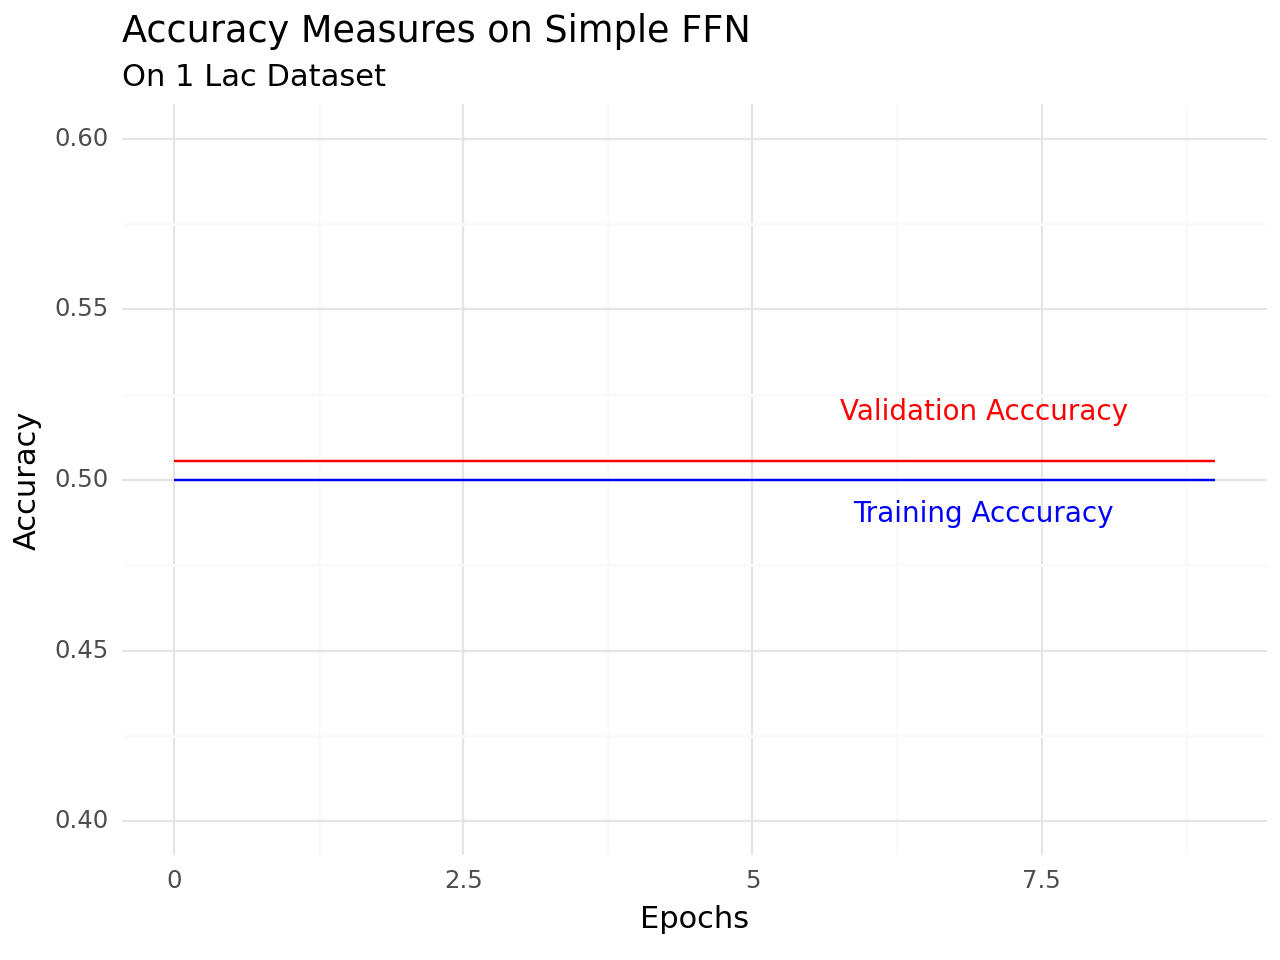

<Figure Size: (640 x 480)>

In [ ]:
( pd.DataFrame(model_ffn_2_history.history) >>
 ggplot(aes(x=pd.DataFrame(model_ffn_2_history.history).index, y='accuracy')) +
 geom_line(color = "blue") +
 geom_line(aes(y='val_accuracy'), color = "red") +
 theme_minimal() +
  labs(x="Epochs", y="Accuracy",
       title= "Accuracy Measures on Simple FFN",
       subtitle = "On 1 Lac Dataset") +
  annotate(
      "text",
      x = 7,
      y = 0.49,
      label = "Training Acccuracy",
      color = "blue",
      size = 10
  ) +
  annotate(
      "text",
      x = 7,
      y = 0.52,
      label = "Validation Acccuracy",
      color = "red",
      size = 10
  ) +
  coord_cartesian(ylim = [0.4,0.6])
 )

<a name='base-model-4'></a>
### 3.4 - Feed Foward NN on whole Dataset

In [ ]:
train_data = traindata
test_data = testdata

train_data['class_index'] = train_data['class_index'].map({1:0, 2:1})
test_data['class_index'] = test_data['class_index'].map({1:0, 2:1})

train_data['review_combined_lemma'] = train_data['review_combined_lemma'].fillna('')
test_data['review_combined_lemma'] = test_data['review_combined_lemma'].fillna('')

X_train = train_data.review_combined_lemma
y_train = np.array(train_data.class_index)

X = test_data.review_combined_lemma
y = np.array(test_data.class_index)

tokenizer = Tokenizer(oov_token="<UNK>",)
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer.word_index['<PAD>'] = 0

In [ ]:
X_sequences_train = tokenizer.texts_to_sequences(X_train)

X_sequences = tokenizer.texts_to_sequences(X)

X_train = pad_sequences(X_sequences_train, maxlen=100)
X = pad_sequences(X_sequences, maxlen=100)



In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(3600000, 100)
(200000, 100)
(200000, 100)


In [ ]:
train_data['class_index'].value_counts()

class_index
1    1800000
0    1800000
Name: count, dtype: int64

In [ ]:
model_ffnn_4 = Sequential()
model_ffnn_4.add(tf.keras.layers.Dense(units=256, activation='tanh',  kernel_initializer=GlorotUniform(), input_shape=(100,)))
model_ffnn_4.add(tf.keras.layers.Dense(units=128, kernel_initializer=GlorotUniform(), activation='relu'))
model_ffnn_4.add(tf.keras.layers.Dense(units=64, kernel_initializer=GlorotUniform(), activation='relu'))
model_ffnn_4.add(tf.keras.layers.Dense(units=32,  kernel_initializer=GlorotUniform(),activation='relu'))
model_ffnn_4.add(tf.keras.layers.Dense(units=16, kernel_initializer=GlorotUniform() ,activation='relu'))
model_ffnn_4.add(tf.keras.layers.Dense(units=1,  kernel_initializer=GlorotUniform(),activation='softmax'))

In [ ]:
model_ffnn_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               25856     
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 69633 (272.00 KB)
Trainable params: 6963

In [ ]:
initial_learning_rate = 0.001

optimizer = Adam(learning_rate=initial_learning_rate)

model_ffnn_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model_ffnn_4_history = model_ffnn_4.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_dev, y_dev))

loss, accuracy = model_ffnn_4.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
56250/56250 [==============================] - 175s 3ms/step - loss: 0.6910 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5009
Epoch 2/10
56250/56250 [==============================] - 174s 3ms/step - loss: 0.6903 - accuracy: 0.5000 - val_loss: 0.6900 - val_accuracy: 0.5009
Epoch 3/10
56250/56250 [==============================] - 173s 3ms/step - loss: 0.6901 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5009
Epoch 4/10
56250/56250 [==============================] - 172s 3ms/step - loss: 0.6900 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5009
Epoch 5/10
56250/56250 [==============================] - 171s 3ms/step - loss: 0.6900 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5009
Epoch 6/10
56250/56250 [==============================] - 172s 3ms/step - loss: 0.6899 - accuracy: 0.5000 - val_loss: 0.6896 - val_accuracy: 0.5009
Epoch 7/10
56250/56250 [==============================] - 171s 3ms/step - loss: 0.6899 - accuracy: 0.5000 - val_

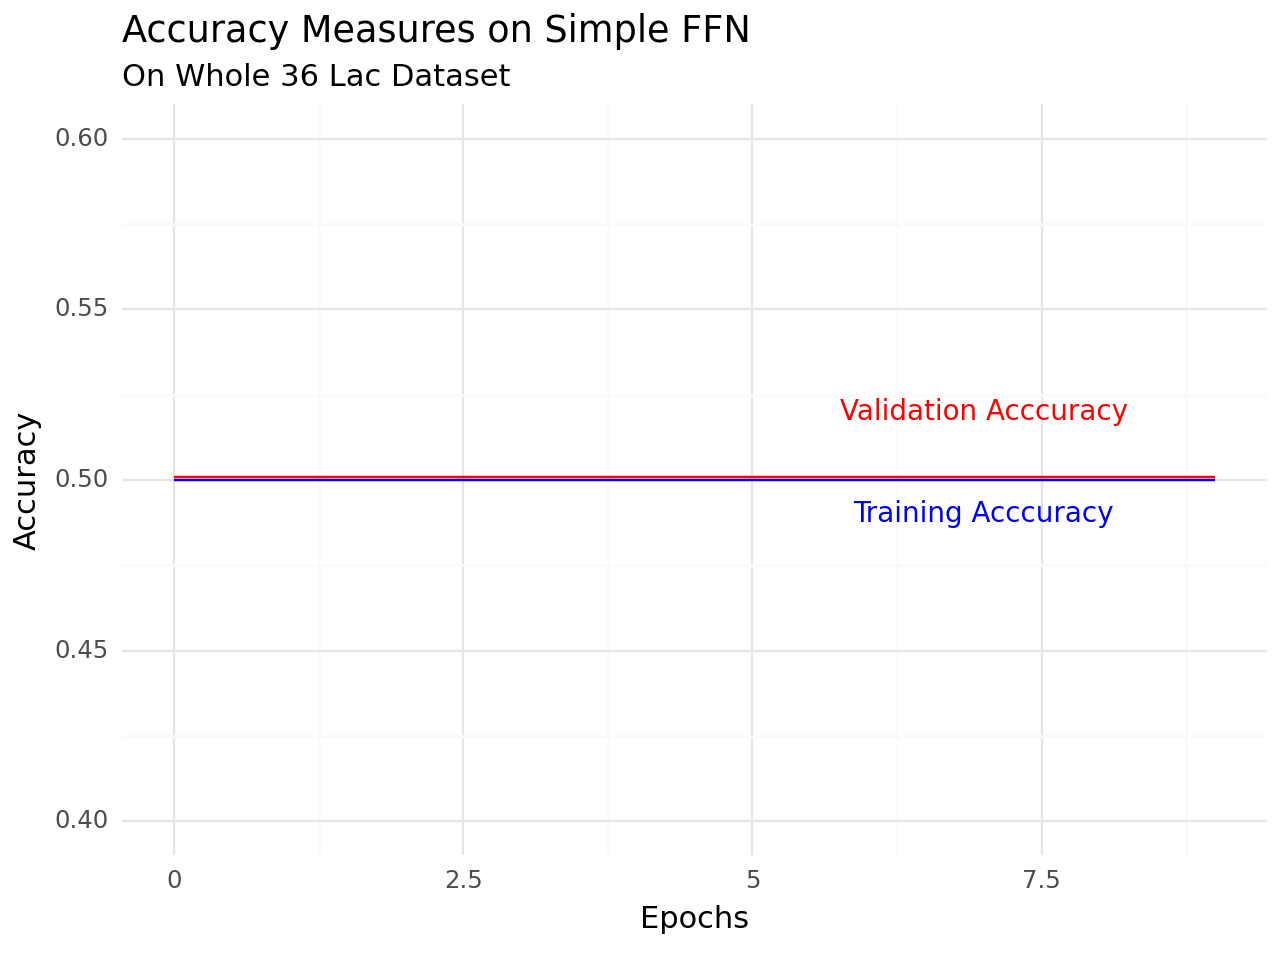

<Figure Size: (640 x 480)>

In [ ]:
( pd.DataFrame(model_ffnn_4_history.history) >>
 ggplot(aes(x=pd.DataFrame(model_ffnn_4_history.history).index, y='accuracy')) +
 geom_line(color = "blue") +
 geom_line(aes(y='val_accuracy'), color = "red") +
 theme_minimal() +
  labs(x="Epochs", y="Accuracy",
       title= "Accuracy Measures on Simple FFN",
       subtitle = "On Whole 36 Lac Dataset") +
  annotate(
      "text",
      x = 7,
      y = 0.49,
      label = "Training Acccuracy",
      color = "blue",
      size = 10
  ) +
  annotate(
      "text",
      x = 7,
      y = 0.52,
      label = "Validation Acccuracy",
      color = "red",
      size = 10
  ) +
  coord_cartesian(ylim = [0.4,0.6])
 )

In [ ]:
pd.DataFrame(model_ffnn_4_history.history).to_csv("model_ffnn_4_history.csv", index=False)